# Wine quality - from theory to technical application and results

# Eploratory data analysis

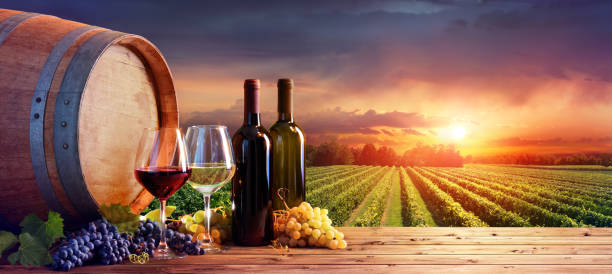

## About Dataset

The following dataset consists of wine quality data. Predictor *Quality* was given by proffesional wine somelier. Every wine has also quantitive attributes based on a measurable quantities like its *alcohol content*, *pH*, etc.

This dataset can be modeled in two different ways:

1. We treat '*Quality*' as a discrete value that can only be a natural number in range 1 - 10, or set that if wine quality is greater than some number then it's *good* wine - otherwise it's *bad*. In this case the modelling part becomes a classification task 

2. We treat '*Quality*' as a continous value that can be any real number from 1 to 10. In this case the modelling part becomes a regression task.

This notebook contains exploratory data analysis. Code with Machine learning and classification models are in different files. 

## References

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
*Modeling wine preferences by data mining from physicochemical properties*, Elsevier, 47(4):547-553. ISSN: 0167-9236.

- doi: https://doi.org/10.1016/j.dss.2009.05.016
- dataset link: https://archive.ics.uci.edu/ml/datasets/wine+quality




In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ';')

## Data Analysis

In [3]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df_red.describe().round(2)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    1599.00              1599.00               1599.00  1599.00  1599.00   
mean        0.09                15.87                 46.47     1.00     3.31   
std         0.05                10.46                 32.90     0.00     0.15   
min         0.01                 1.00                  6.00     0.99     2.74   
25%         0.07                 7.00                 22.00     1.00     3.21   
50%         0.08                14.00                 38.00     1.00     3.31   
75%         0.09                21.00                 62.00     1.00     3.40   
max         0.61                72.00                289.00     1.00     4.01   

       sulphates  alcohol  quality  
count    1599.00  1599.00  1599.00  
mean        0.66    10.42     5.64  
std         0.17     1.07     0.81  
min         0.33     8.40     3.00  
25%         0.55     9.50     5.00  
50%         0.62    10.20     6.00  
75%         0.73    11.10     6.00  
max         2.00    14.90     8.00

In [6]:
df_white.describe().round(2)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count        4898.00           4898.00      4898.00         4898.00   
mean            6.85              0.28         0.33            6.39   
std             0.84              0.10         0.12            5.07   
min             3.80              0.08         0.00            0.60   
25%             6.30              0.21         0.27            1.70   
50%             6.80              0.26         0.32            5.20   
75%             7.30              0.32         0.39            9.90   
max            14.20              1.10         1.66           65.80   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    4898.00              4898.00               4898.00  4898.00  4898.00   
mean        0.05                35.31                138.36     0.99     3.19   
std         0.02                17.01                 42.50     0.00     0.15   
min         0.01                 2.00                  9.00     0.99     2.72   
25%         0.04                23.00                108.00     0.99     3.09   
50%         0.04                34.00                134.00     0.99     3.18   
75%         0.05                46.00                167.00     1.00     3.28   
max         0.35               289.00                440.00     1.04     3.82   

       sulphates  alcohol  quality  
count    4898.00  4898.00  4898.00  
mean        0.49    10.51     5.88  
std         0.11     1.23     0.89  
min         0.22     8.00     3.00  
25%         0.41     9.50     5.00  
50%         0.47    10.40     6.00  
75%         0.55    11.40     6.00  
max         1.08    14.20     9.00

- No NaN values - that's great
- Every feature has different scale. For example in red wines 'chlorides' are bounded between 0.01 and 0.61 and 'total sulfur dioxid' ranges from 6 to 289. 

**It's good idea to normalize them later**.

## Target distribution

Text(0.5, 1.0, 'Red wine quality distribution')

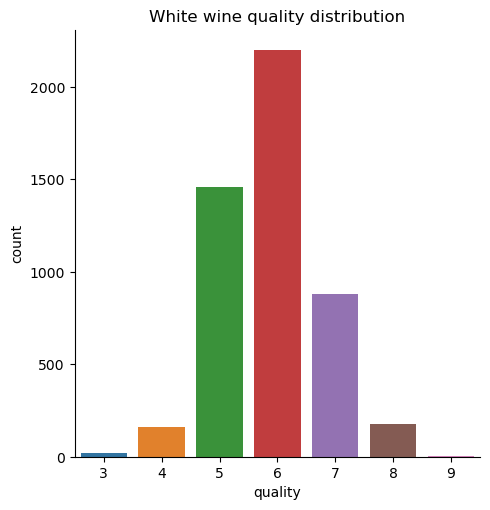

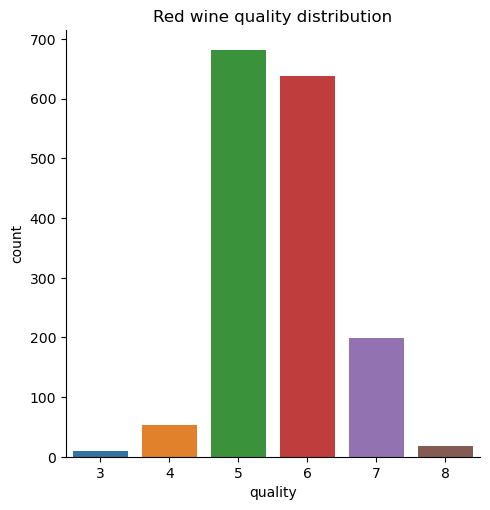

In [7]:
sns.catplot(data=df_white, x='quality', kind='count')
ax = plt.gca()
ax.set_title("White wine quality distribution")

sns.catplot(data=df_red, x='quality', kind='count')
ax = plt.gca()
ax.set_title("Red wine quality distribution")

### Correlation

Let's create a correlation matrix heatmap to explore the degree of correlation between different features. We are going to use built in pandas method *DataFrame.corr()* ; by default it returns Pearson correlation coefficient between different columns of a given dataframe. 

Pearson correlation coefficient of 2 independent features $X$ and $Y$ is defined as:

$$
 r_{X,Y}= \frac{\operatorname{cov}(X,Y)}{\sigma_X \sigma_Y}, 
$$

where $\operatorname{cov}(X,Y) $ is a covariance between $X$ and $Y$ and $\sigma$ stands for std. deviation of a given feature. Corr. coefficient is bounded by $-1 \le r_{X,Y} \le 1$, where $1$ represents maximum, positive linear correlation and $-1$ a maximum, negative linear correlation.


In [8]:
def correlation_plot(dataframe, title):
    plt.figure(figsize=(8, 8))
    sns.heatmap(dataframe.corr().round(2), annot = True, 
                vmin = -1, vmax = 1, cmap = 'inferno')
    plt.title(title)
    plt.show()

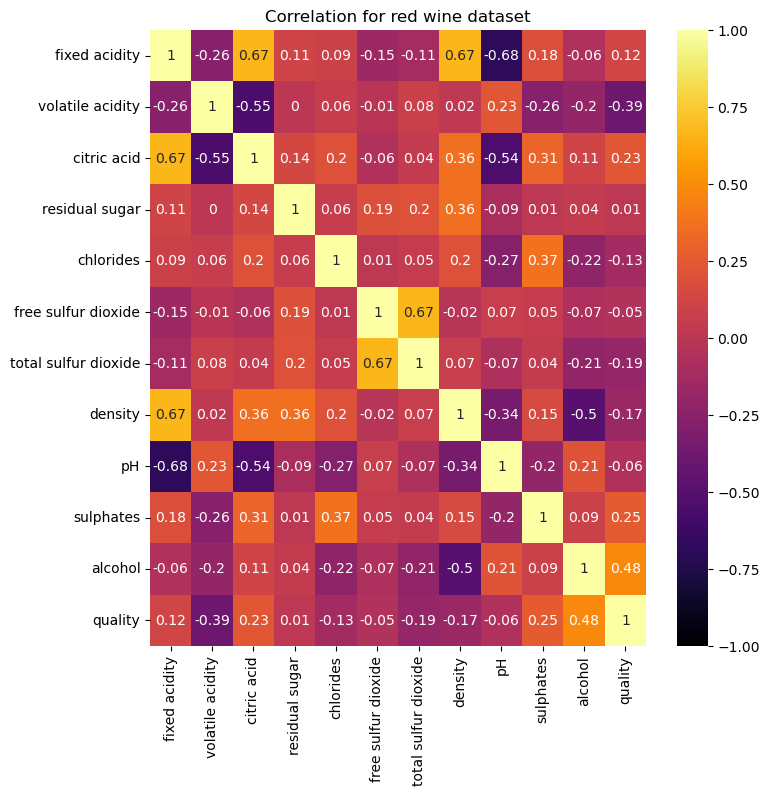

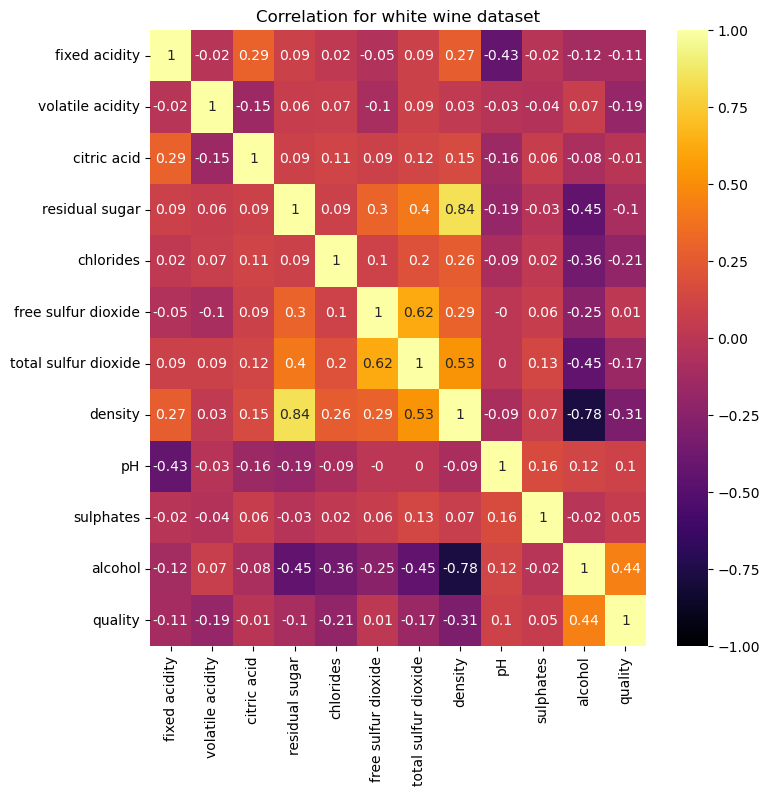

In [9]:
correlation_plot(df_red, title = "Correlation for red wine dataset")
correlation_plot(df_white, title = "Correlation for white wine dataset")

## Observations 1

We see that *total sulfur dioxide* and *free sulfur dioxide* are self corelated - we can drop one of these features.

In [10]:
df_red = df_red.drop('free sulfur dioxide', axis = 1)
df_white = df_white.drop('total sulfur dioxide', axis = 1)

In [11]:
sns.pairplot(df_red)
sns.pairplot(df_white)

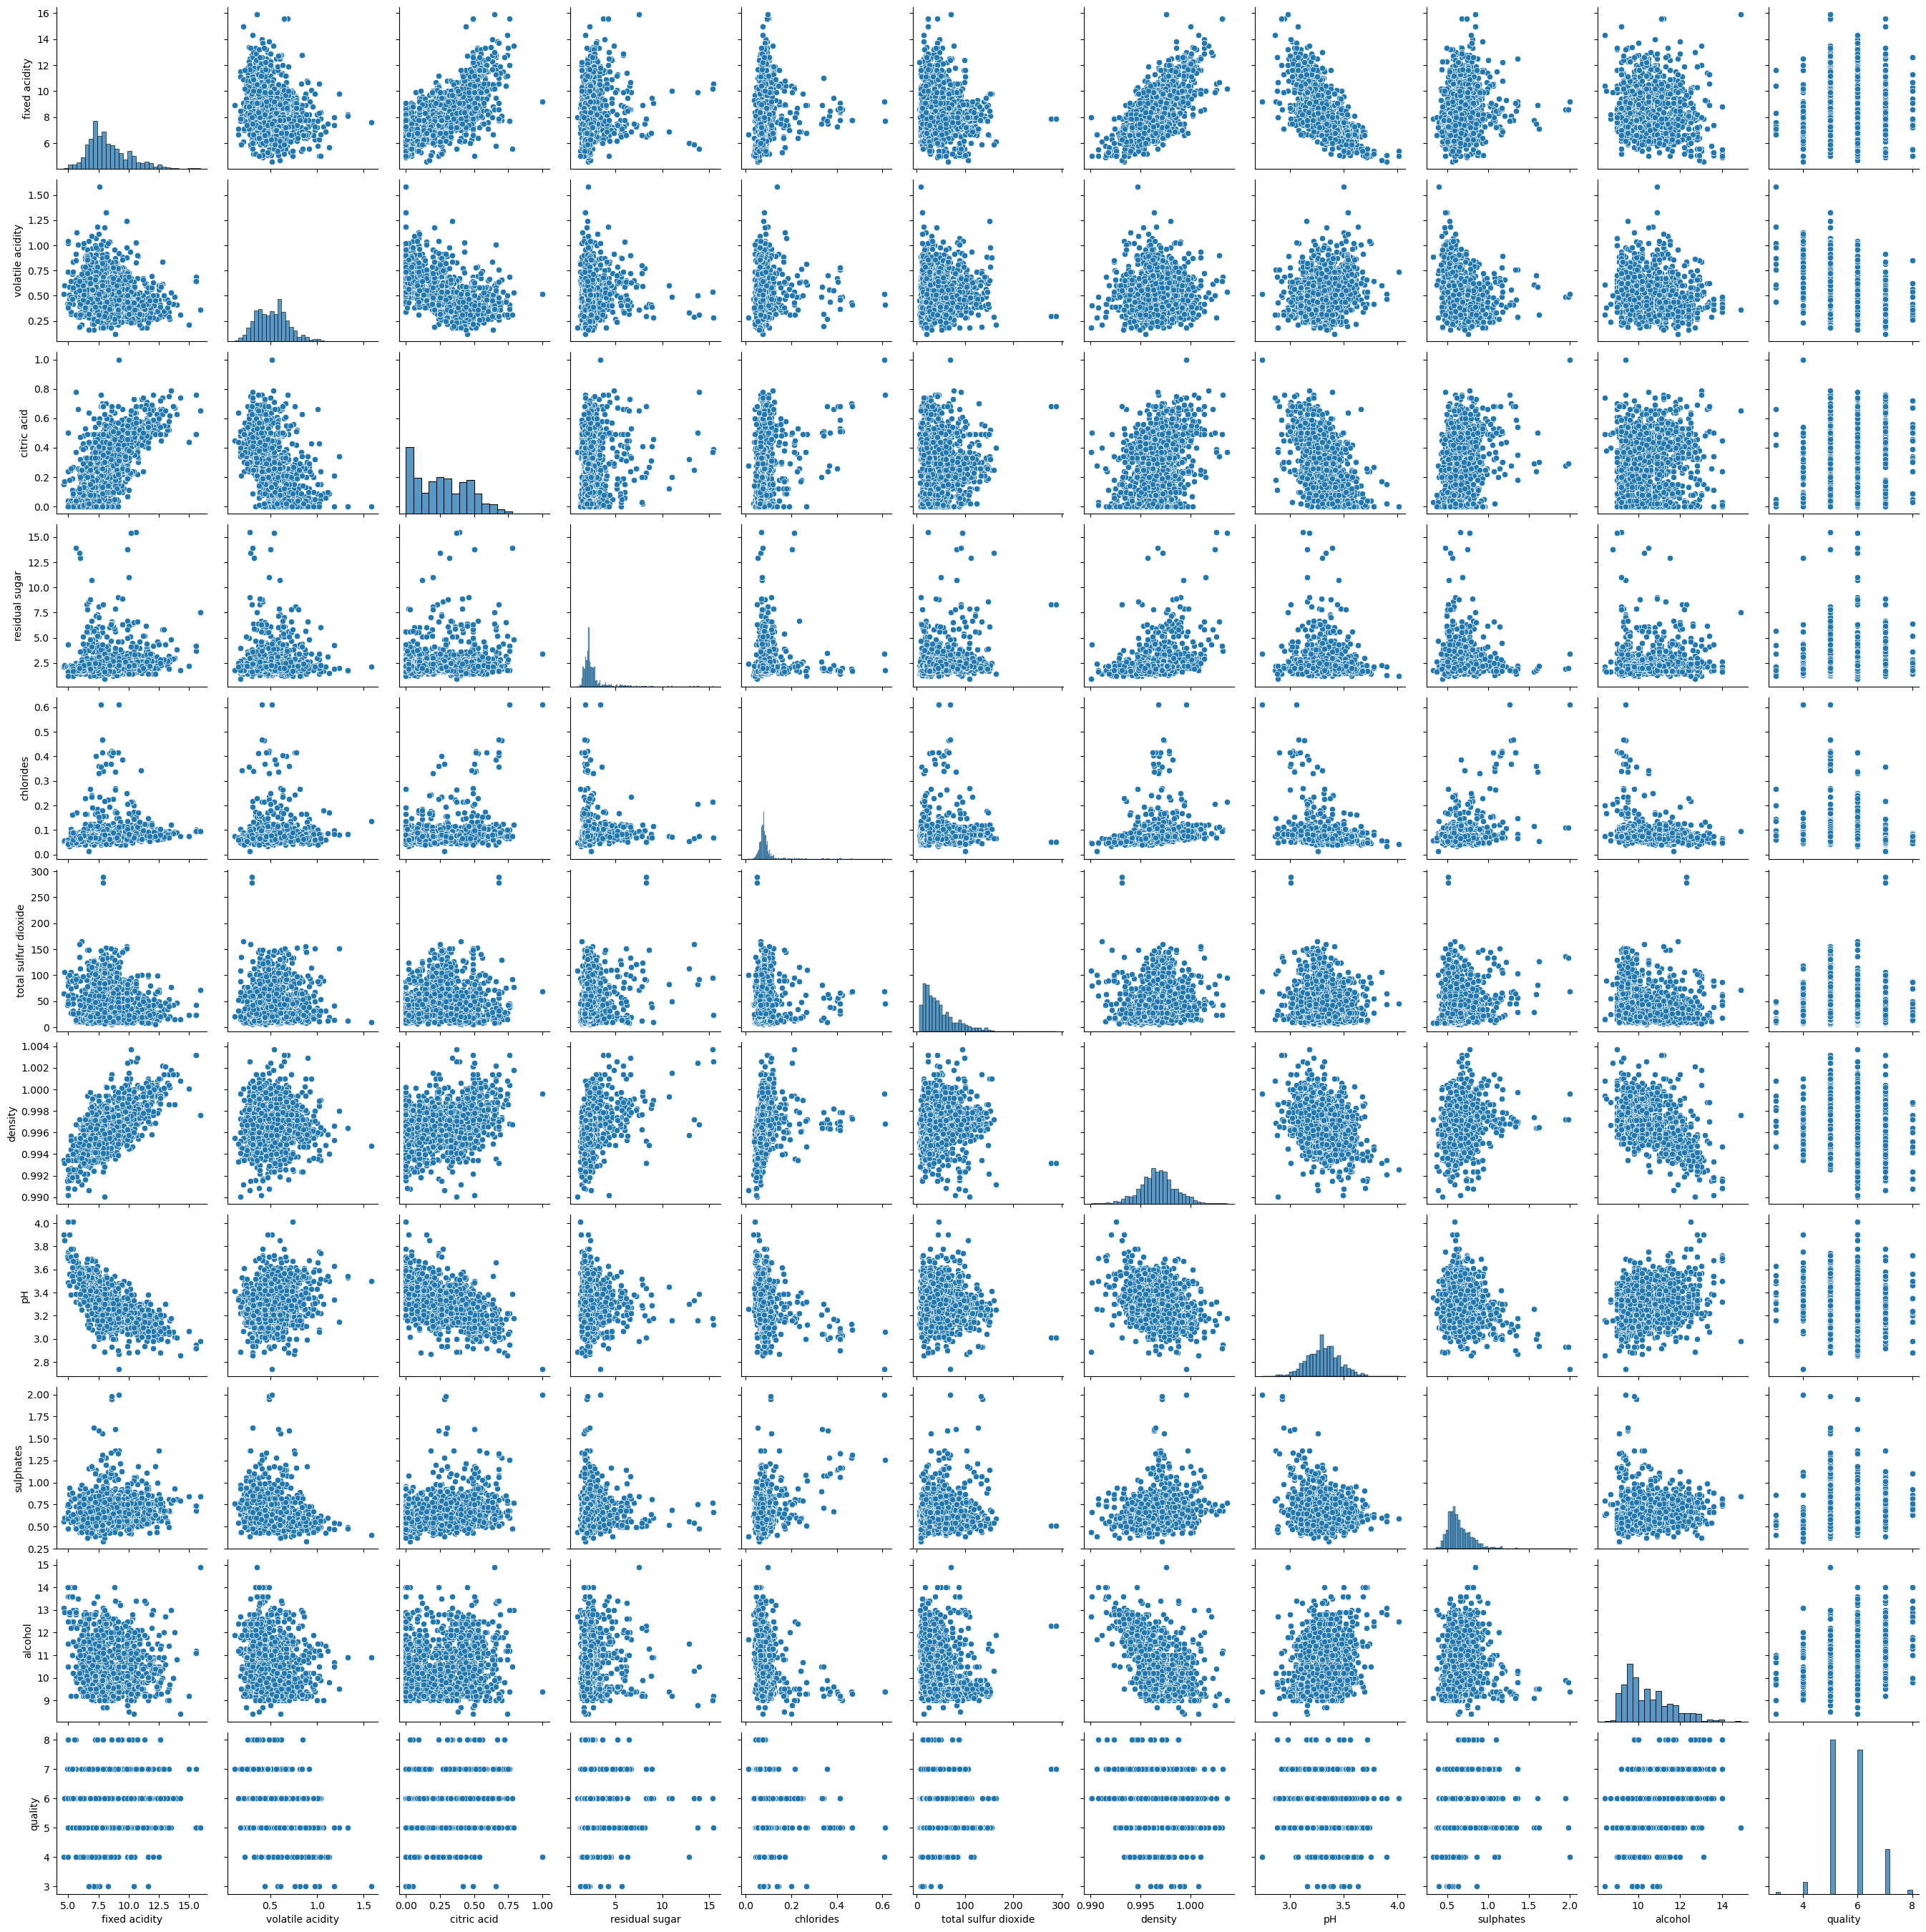

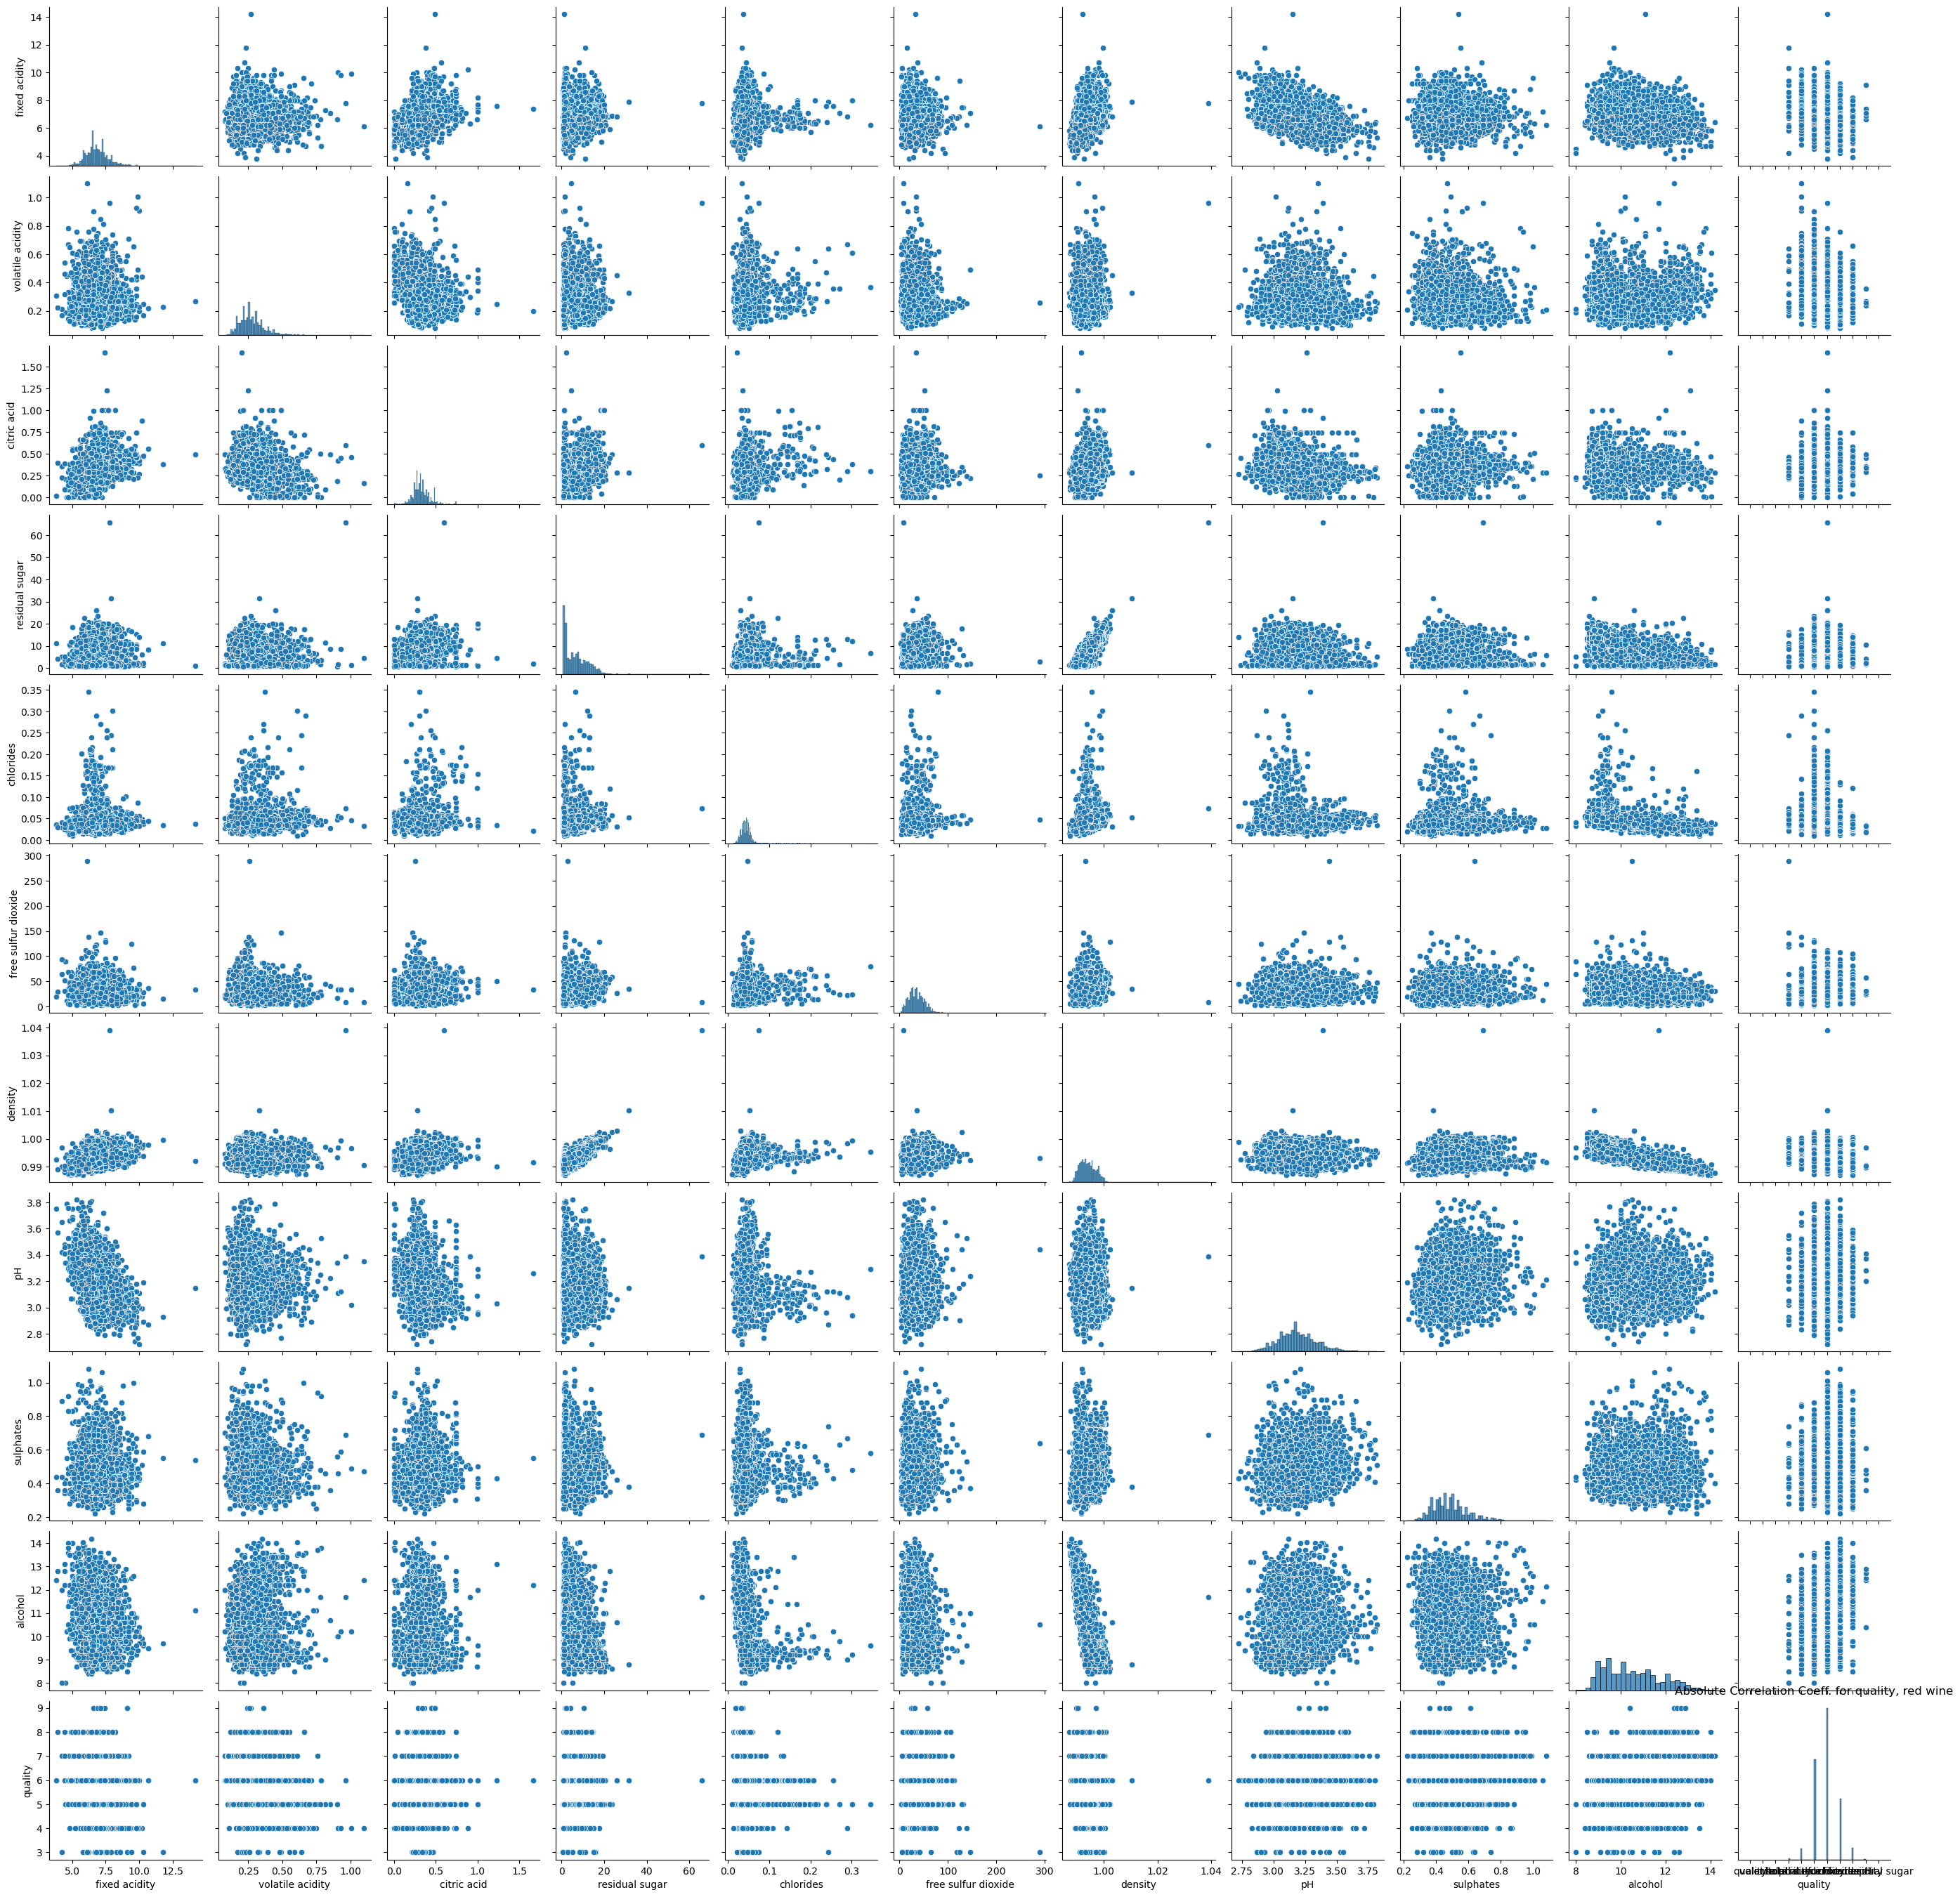

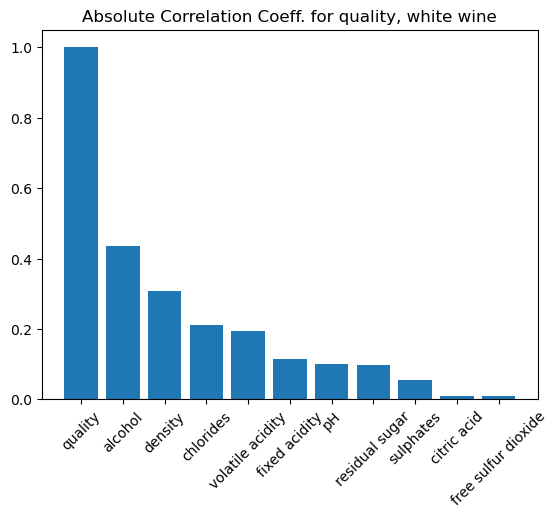

In [12]:
def correlation_with_target_plot(dataframe, target, name):
    corr_list = dataframe.corr()[target]
    sorted_corr = corr_list.abs().sort_values(ascending=False)
    
    plt.bar(sorted_corr.index, sorted_corr)
    plt.title(f'Absolute Correlation Coeff. for {target}, {name}')
    plt.xticks(rotation=45)
    plt.show()
    
correlation_with_target_plot(df_red, 'quality', 'red wine')
correlation_with_target_plot(df_white, 'quality', 'white wine')

## Observations 2

- Some quantities don't have normal distributions,
- Some quantities are skewed,
- For both datasets we see strong correlation between *quality* and *alcohol*

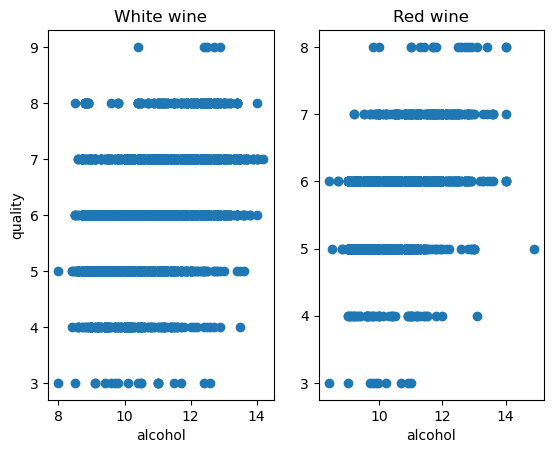

In [13]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(df_white['alcohol'], df_white['quality'])
axs[0].set_title('White wine')
axs[1].scatter(df_red['alcohol'], df_red['quality'])
axs[1].set_title('Red wine')
axs[0].set(xlabel = 'alcohol', ylabel='quality')
axs[1].set(xlabel = 'alcohol')
plt.show()

## Labels  for classification task

We define the following labels based on *quality*

$$   \text{Label} =\left\{
  \begin{array}{@{}ll@{}}
    0 & \text(bad) &  \text{if} & \text{quality} \le 5 \\
    1 & \text(good) &  \text{if} & \text{quality} > 5
  \end{array}\right. $$

In [14]:
df_white['label'] = df_white['quality'].apply(lambda x: 1 if x > 5 else 0)
df_red['label'] = df_red['quality'].apply(lambda x: 1 if x > 5 else 0)

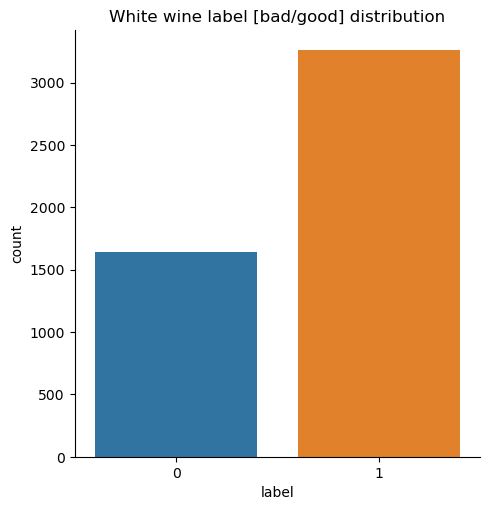

In [15]:
sns.catplot(data=df_white, x='label', kind='count')
ax = plt.gca()
ax.set_title("White wine label [bad/good] distribution")
plt.show()

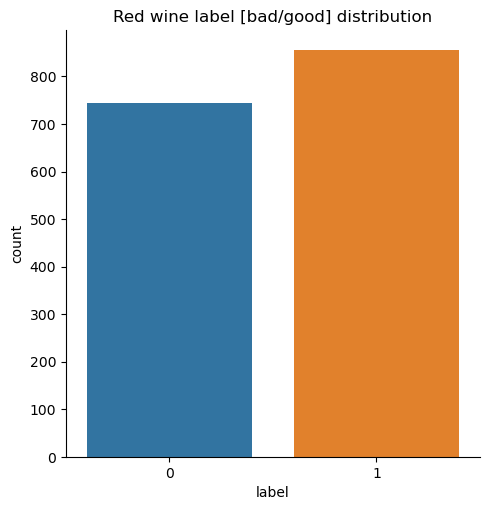

In [16]:
sns.catplot(data=df_red, x='label', kind='count')
ax = plt.gca()
ax.set_title("Red wine label [bad/good] distribution")

plt.show()

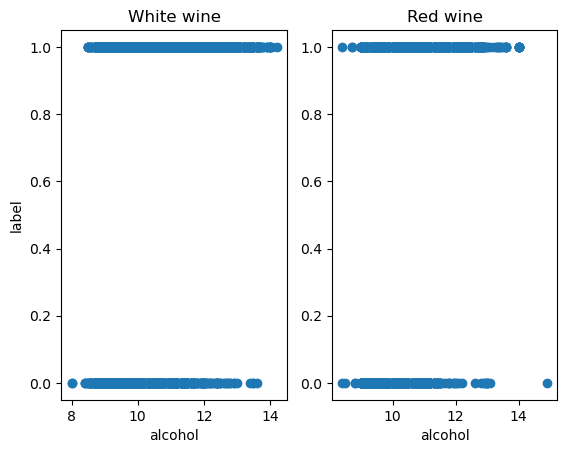

In [17]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(df_white['alcohol'], df_white['label'])
axs[0].set_title('White wine')
axs[1].scatter(df_red['alcohol'], df_red['label'])
axs[1].set_title('Red wine')
axs[0].set(xlabel = 'alcohol', ylabel='label')
axs[1].set(xlabel = 'alcohol')
plt.show()

In [18]:
df_white.to_csv('white_wine_data.csv')
df_red.to_csv('red_wine_data.csv')

## Dimensionality reduction

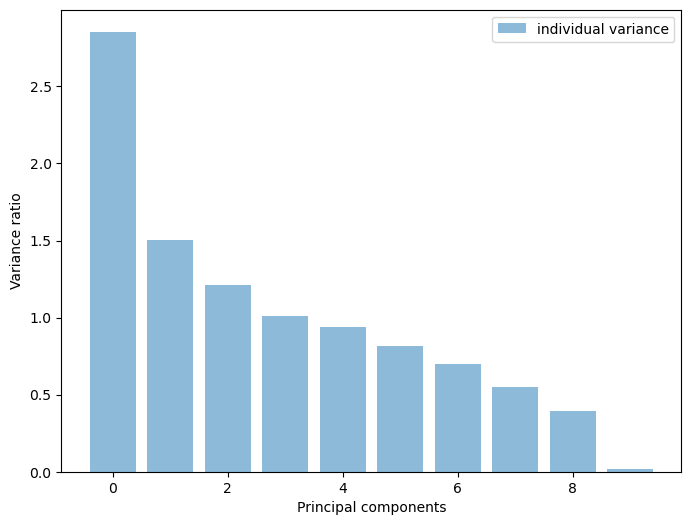

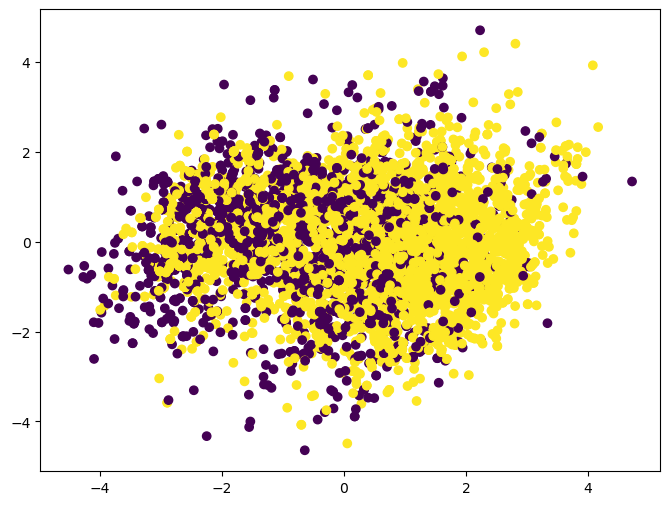

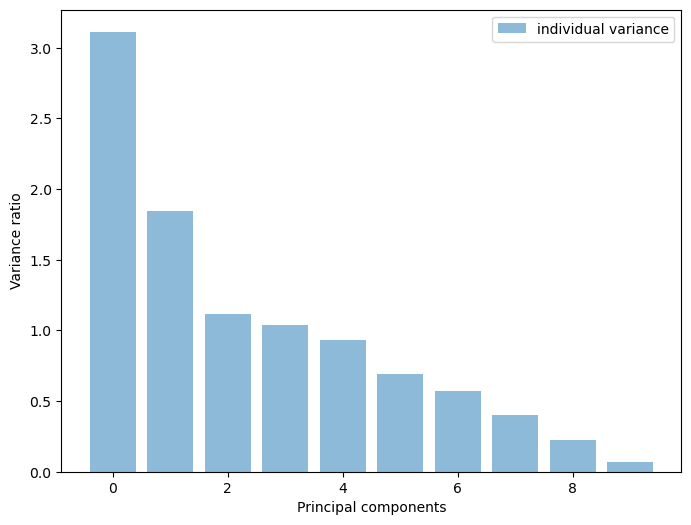

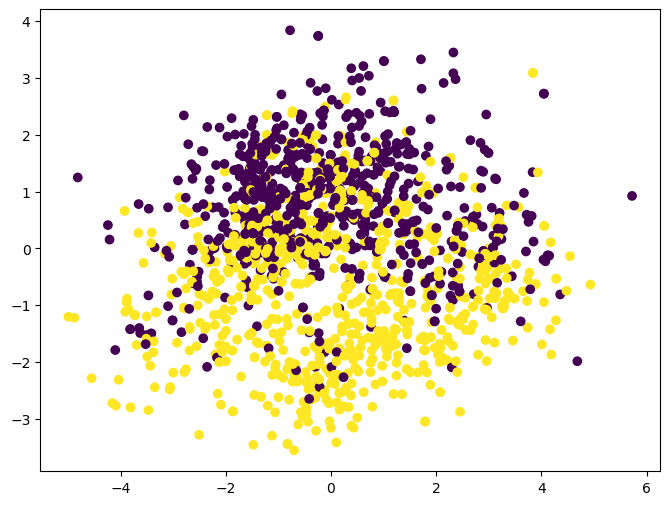

array([[-0.53253158,  1.00913721, -1.39398429, ...,  1.3280004 ,
        -0.62068932, -1.00563318],
       [-0.29901506,  2.30921273, -1.39398429, ..., -0.73607999,
         0.16017789, -0.56466034],
       [-0.29901506,  1.44249571, -1.18810235, ..., -0.33658056,
        -0.03503891, -0.56466034],
       ...,
       [-1.17470202, -0.21871189, -0.72486797, ...,  0.72875125,
         0.61568376,  0.61126723],
       [-1.40821855,  0.61189191, -0.77633846, ...,  1.72749983,
         0.35539469, -0.1236875 ],
       [-1.34983941, -1.12154211,  1.02512857, ...,  0.52900154,
         0.03003335,  0.61126723]])

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

encoder = LabelEncoder()

def dimensionality_reduction(data):
    df = data.copy()
    for col in df.columns:
        df[col] = encoder.fit_transform(df[col])
        
    y = df['label']
    x = df.drop(['quality', 'label'], axis=1)
    
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    pca = PCA()
    pca.fit_transform(x)
    pca_variance = pca.explained_variance_

    plt.figure(figsize=(8, 6))
    plt.bar(range(10), pca_variance, alpha=0.5, align='center', label='individual variance')
    plt.legend()
    plt.ylabel('Variance ratio')
    plt.xlabel('Principal components')
    plt.show()
    
    pca2 = PCA(n_components = 2)
    pca2.fit(x)
    x_3d = pca2.transform(x)

    plt.figure(figsize=(8,6))
    plt.scatter(x_3d[:,0], x_3d[:,1], c=df['label'])
    plt.show()

    return x

dimensionality_reduction(df_white)

dimensionality_reduction(df_red)